# Ten Trees A Day #7
CS 511
Winter 2020

Steve Braich

---
Import dependencies



In [1]:
import nltk
import inspect
import emoji
from IPython.display import display
from nltk.parse import stanford
import tree as psu_parser

model_path = "C:\\workspace_courses\\LING511\\tree_generator\\englishPCFG.ser.gz"
stanford_parser = stanford.StanfordParser(model_path=model_path)
tree = psu_parser.Tree(parser=stanford_parser)

from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

c:\workspace_courses\ling511\tree_generator\venv\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: The StanfordParser will be deprecated
Please use nltk.parse.corenlp.CoreNLPParser instead.
  if __name__ == '__main__':



### ✅ Tree #1 <font color='green'>CORRECT</font>

The mare quickly assessed the situation


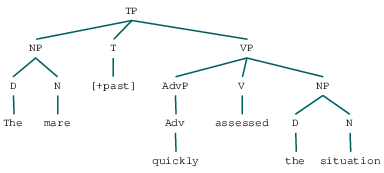

In [2]:
sentence = "The mare quickly assessed the situation"
t = tree.parse_sentence(sentence, require_tense=True)
display(t)

### ✅ Tree #2 <font color='green'>CORRECT</font>

That the buffalo was in trouble was clear to her


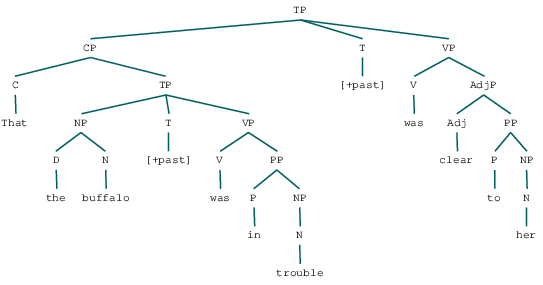

In [3]:
sentence = "That the buffalo was in trouble was clear to her"
t = tree.parse_sentence(sentence, require_tense=True)
display(t)

### ✅ Tree #3 <font color='green'>CORRECT</font>

The river was flowing too fast for him


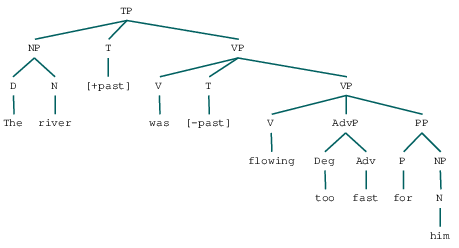

In [4]:
sentence = "The river was flowing too fast for him"
t = tree.parse_sentence(sentence, require_tense=True)
display(t)

### ✅ Tree #4 <font color='green'>CORRECT</font>

Her options were very limited


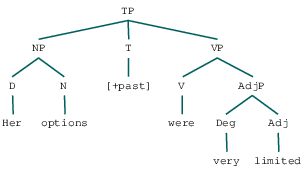

In [5]:
sentence = "Her options were very limited"
t = tree.parse_sentence(sentence, require_tense=True)
display(t)

### ✅ Tree #5 <font color='green'>CORRECT</font>

She saw a large branch on the river bank


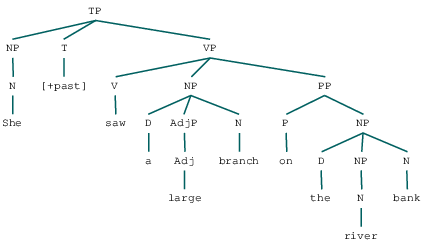

In [6]:
sentence = "She saw a large branch on the river bank"
t = tree.parse_sentence(sentence, require_tense=True)
display(t)

### ✅ Tree #6 <font color='green'>CORRECT</font>

She swiftly grabbed the branch with her teeth


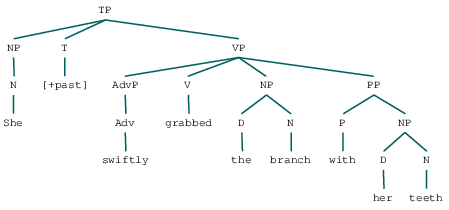

In [7]:
sentence = "She swiftly grabbed the branch with her teeth"
t = tree.parse_sentence(sentence, require_tense=True)
display(t)

### ✅ Tree #7 <font color='green'>CORRECT</font>

She tossed the branch into the river


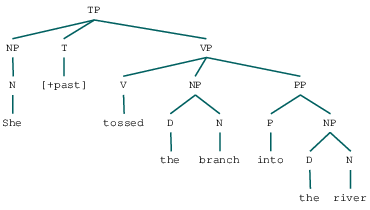

In [8]:
sentence = "She tossed the branch into the river"
t = tree.parse_sentence(sentence, require_tense=True)
display(t)

### ❌ ~~Tree #8~~ <font color='red'>INCORRECT</font>

This sentence is difficult code because it has two different types of tense phrases:
1) She then yelled
2) to swim to it

I got the first one correct.  However, the Stanford Parser simply tags the word 'to' as TO.
It doesn't attempt to figure out if it's parent is a VP, which would make 'to' a C and it should be
moved to a TP.  Furthermore, if 'to' was a child of a PP, then it would be a preposition P.
I didn't have time to implement this yet.

She then yelled for him to swim to it


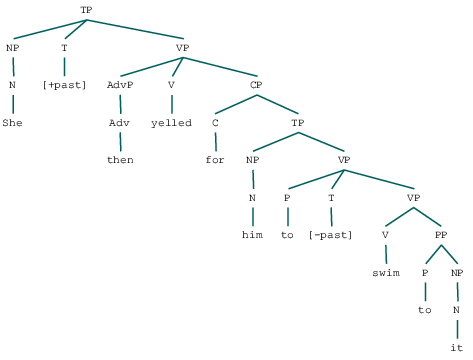

In [9]:
sentence = "She then yelled for him to swim to it"
t = tree.parse_sentence(sentence, require_tense=True)
display(t)

### ✅ Tree #8 <font color='green'>CORRECT</font>

So, the way that I correct this is to manually type in the parse string:

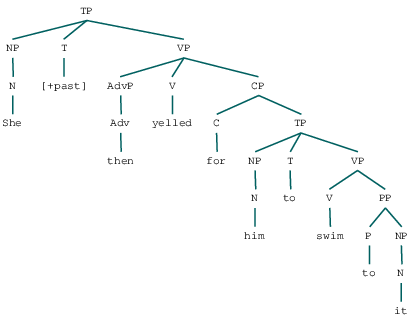

In [10]:
correct_t = inspect.cleandoc("""
    (TP
        (NP (N She))
        (T [+past])
        (VP
            (AdvP (Adv then))
            (V yelled)
            (CP
                (C for)
                (TP
                    (NP (N him))
                    (T to)
                    (VP
                        (V swim)
                        (PP
                            (P to)
                            (NP (N it))
                        )
                    )
                )
            )
        )
    )""")

t = nltk.Tree.fromstring(correct_t)
display(t)

### ❌ ~~Tree #9~~ <font color='red'>INCORRECT</font>

For some reason, unbeknownst to me, the Stanford parser thinks that the word 'swam' is a noun???

In that case, my program can't do much with that.

The buffalo swam to the branch


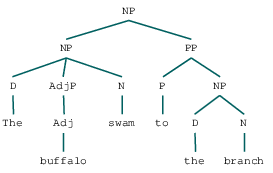

In [11]:
sentence = "The buffalo swam to the branch"
t = tree.parse_sentence(sentence, require_tense=True)
display(t)

### ✅ Tree #9 <font color='green'>CORRECT</font>

However, if I change 'swam' to 'ran', the parse tree structure is correct:

The buffalo ran to the branch


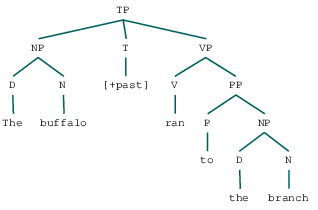

In [12]:
sentence = "The buffalo ran to the branch"
t = tree.parse_sentence(sentence, require_tense=True)
display(t)

### ❌ ~~Tree #10~~ <font color='red'>INCORRECT</font>

So here, I have two different types of tense phrases:
1) He wished that...
2) he could grab the branch...

I haven't yet figured out how to NOT add the verb tense when we have a modal like 'could'.
I can code one or the other, but I haven't yet been able implement a function that handles both in the
same sentence.

In this example, notice how I got the first one right but the second one is messed up.

He wished that he had opposable thumbs so he could grab the branch


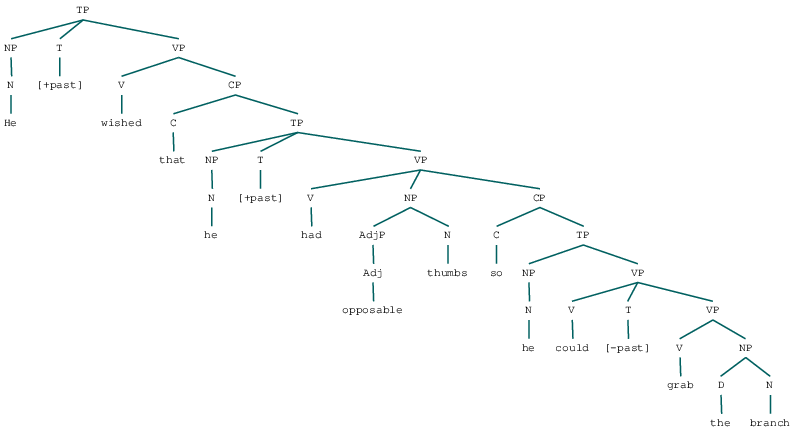

In [13]:
sentence = "He wished that he had opposable thumbs so he could grab the branch"
t = tree.parse_sentence(sentence, require_tense=True)
display(t)

### ✅ Tree #10 <font color='green'>CORRECT</font>

I manually entered the correct parse string here to generate the correct parse tree.

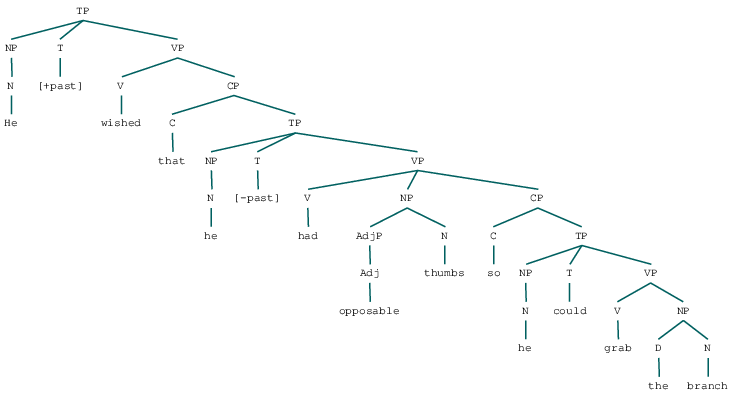

In [14]:
correct_t = inspect.cleandoc("""
    (TP
    (NP (N He))
    (T [+past])
    (VP
      (V wished)
      (CP
        (C that)
        (TP
          (NP (N he))
          (T [-past])
          (VP
            (V had)
            (NP (AdjP (Adj opposable)) (N thumbs))
            (CP
              (C so)
              (TP
                (NP (N he))
                (T could)
                (VP (V grab) (NP (D the) (N branch))))))))))""")

t = nltk.Tree.fromstring(correct_t)
display(t)